In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files 
uploaded=files.upload()

Saving flight_delays_train.csv to flight_delays_train.csv


In [ ]:
df=pd.read_csv('flight_delays_train.csv')          #df is var for file
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [ ]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [ ]:
df['Month'] = df['Month'].str.replace('c-','')
df['DayofMonth'] = df['DayofMonth'].str.replace('c-','')
df['DayOfWeek'] = df['DayOfWeek'].str.replace('c-','')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,N
99996,1,18,3,804,CO,EWR,DAB,884,N
99997,1,24,2,1901,NW,DTW,IAH,1076,N
99998,4,27,4,1515,MQ,DFW,GGG,140,N


In [ ]:
df_dc=pd.get_dummies(df,columns=['dep_delayed_15min'],drop_first=True)
df_dc

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min_Y
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [ ]:
for col in df.columns:
  print('{}:{}'.format(col,df[col].unique()))

Month:['8' '4' '9' '11' '10' '1' '7' '6' '5' '3' '12' '2']
DayofMonth:['21' '20' '2' '25' '7' '3' '27' '29' '28' '5' '6' '10' '19' '26' '14'
 '22' '9' '31' '4' '16' '18' '30' '1' '24' '15' '17' '8' '12' '13' '11'
 '23']
DayOfWeek:['7' '3' '5' '6' '4' '2' '1']
DepTime:[1934 1548 1422 ... 2530  219 2415]
UniqueCarrier:['AA' 'US' 'XE' 'OO' 'WN' 'NW' 'DL' 'OH' 'AS' 'UA' 'MQ' 'CO' 'EV' 'DH'
 'YV' 'F9' 'AQ' 'TZ' 'HP' 'B6' 'FL' 'HA']
Origin:['ATL' 'PIT' 'RDU' 'DEN' 'MDW' 'MEM' 'PBI' 'MSP' 'ONT' 'BDL' 'PHX' 'LAS'
 'DFW' 'DSM' 'CMH' 'ORF' 'SLC' 'CLT' 'GSO' 'IAD' 'SMF' 'FLL' 'DAL' 'ORD'
 'ITO' 'SAN' 'ROA' 'LGA' 'SFO' 'GSP' 'SEA' 'DAB' 'SJC' 'LIT' 'LAX' 'OAK'
 'COS' 'OKC' 'GRR' 'JFK' 'BOI' 'MCI' 'BWI' 'BHM' 'CRP' 'BOS' 'SAT' 'PHL'
 'STL' 'CIC' 'AUS' 'IAH' 'COD' 'HNL' 'RNO' 'BNA' 'TPA' 'MIA' 'EVV' 'PNS'
 'EWR' 'RSW' 'ANC' 'SNA' 'AMA' 'CID' 'DTW' 'DCA' 'LGB' 'MAF' 'MFE' 'BMI'
 'PDX' 'IPL' 'GRB' 'FAR' 'HOU' 'MTJ' 'DRO' 'MLU' 'VPS' 'TUL' 'CVG' 'SBA'
 'PWM' 'IDA' 'MCO' 'ACV' 'CHS' 'BGM' 'MSY' 'OGG' 'C

In [ ]:
df_dc=pd.get_dummies(df,columns=['dep_delayed_15min'],drop_first=True)
df_dc

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min_Y
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


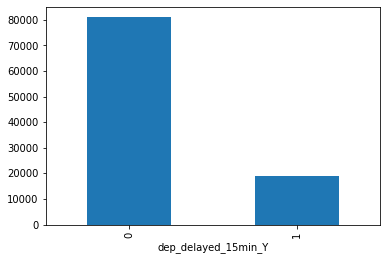

In [ ]:
df_dc.groupby('dep_delayed_15min_Y').size().plot.bar()

In [ ]:
df_dc["Origin"].value_counts()


ATL    5834
ORD    4870
DFW    4270
LAX    3259
IAH    3048
       ... 
VIS       1
WYS       1
ILG       1
VCT       1
ADK       1
Name: Origin, Length: 289, dtype: int64

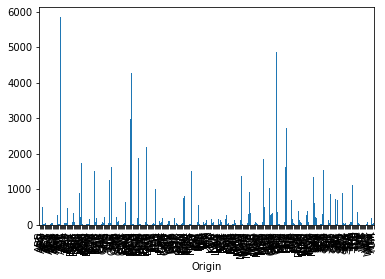

In [ ]:
df_dc.groupby('Origin').size().plot.bar()

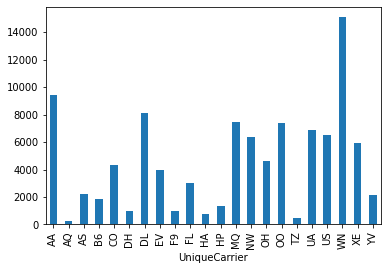

In [ ]:
df_dc.groupby('UniqueCarrier').size().plot.bar()

In [ ]:
df_dc["Dest"].value_counts()


ATL    5795
ORD    4933
DFW    4337
LAX    3205
IAH    3056
       ... 
LWB       1
TEX       1
ACK       1
TTN       1
VCT       1
Name: Dest, Length: 289, dtype: int64

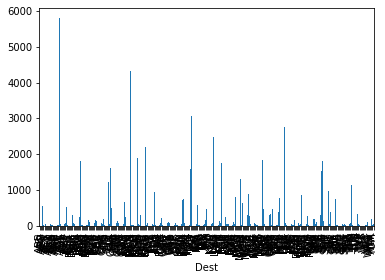

In [ ]:
df_dc.groupby('Dest').size().plot.bar()

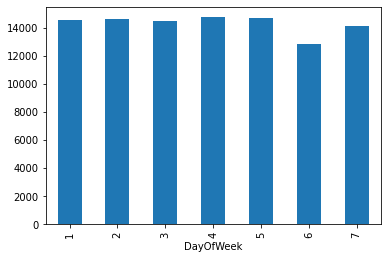

In [ ]:
df_dc.groupby('DayOfWeek').size().plot.bar()

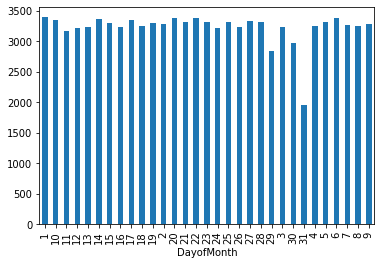

In [ ]:
df_dc.groupby('DayofMonth').size().plot.bar()

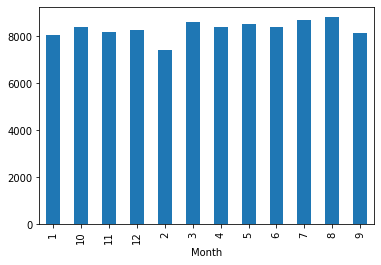

In [ ]:
df_dc.groupby('Month').size().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fbfb81d0>]],
      dtype=object)

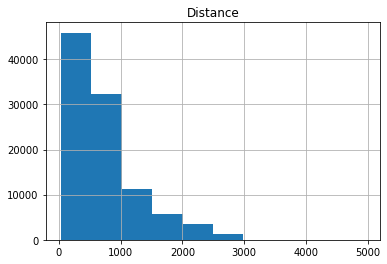

In [ ]:
df_dc.hist(column='Distance')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fb9b5f10>]],
      dtype=object)

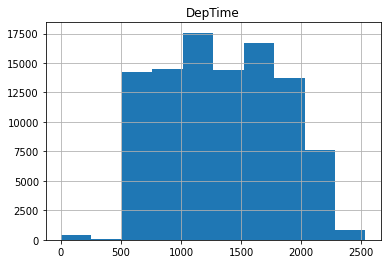

In [ ]:
df_dc.hist(column='DepTime')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder= LabelEncoder()
df_dc["UniqueCarrier"]=encoder.fit_transform(df_dc["UniqueCarrier"])
df_dc["Origin"]=encoder.fit_transform(df_dc["Origin"])
df_dc["Dest"]=encoder.fit_transform(df_dc["Dest"])


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df_dc.dep_delayed_15min_Y
x=df_dc.drop('dep_delayed_15min_Y',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression        #Implementing Logistic Regression 
predictor=LogisticRegression()
predictor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
prediction=predictor.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      1.00      0.89     16166\n           1       0.33      0.01      0.02      3834\n\n    accuracy                           0.81     20000\n   macro avg       0.57      0.50      0.46     20000\nweighted avg       0.72      0.81      0.72     20000\n'

In [ ]:
confusion_matrix(y_test,prediction)

array([[16095,    71],
       [ 3799,    35]])

In [ ]:
accuracy_score(y_test,prediction)

0.8065

Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
prediction_ii = dtree.predict(x_test)

In [ ]:
classification_report(y_test,prediction_ii)

'              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83     16166\n           1       0.31      0.33      0.32      3834\n\n    accuracy                           0.73     20000\n   macro avg       0.57      0.58      0.58     20000\nweighted avg       0.74      0.73      0.73     20000\n'

In [ ]:
confusion_matrix(y_test,prediction_ii)

array([[13308,  2858],
       [ 2556,  1278]])

In [ ]:
accuracy_score(y_test,prediction_ii)

0.7293

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction_iv=nb.predict(x_test)

In [ ]:
classification_report(y_test,prediction_iv)

'              precision    recall  f1-score   support\n\n           0       0.81      1.00      0.89     16166\n           1       1.00      0.00      0.00      3834\n\n    accuracy                           0.81     20000\n   macro avg       0.90      0.50      0.45     20000\nweighted avg       0.85      0.81      0.72     20000\n'

In [ ]:
confusion_matrix(y_test,prediction_iv)

array([[16166,     0],
       [ 3831,     3]])

In [ ]:
accuracy_score(y_test,prediction_iv)

0.80845

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving flight_delays_test.csv to flight_delays_test.csv


In [ ]:
data=pd.read_csv('flight_delays_test.csv')          #df is var for file
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [ ]:
data.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1338.936600,723.13011
std,480.554102,563.22322
min,1.000000,31.00000
25%,928.000000,321.00000
50%,1329.000000,574.00000
75%,1733.000000,948.00000
max,2400.000000,4962.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [ ]:
data.isnull().sum()

Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64

In [ ]:
data['Month'] = data['Month'].str.replace('c-','')
data['DayofMonth'] = data['DayofMonth'].str.replace('c-','')
data['DayOfWeek'] = data['DayOfWeek'].str.replace('c-','')
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,YV,MRY,PHX,598
1,4,17,2,739,WN,LAS,HOU,1235
2,12,2,7,651,MQ,GSP,ORD,577
3,3,25,7,1614,WN,BWI,MHT,377
4,6,6,3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,6,5,2,852,WN,CRP,HOU,187
99996,11,24,6,1446,UA,ORD,LAS,1515
99997,1,30,2,1509,OO,ORD,SGF,438
99998,1,5,5,804,DL,LGA,ATL,761


In [ ]:
encoder= LabelEncoder()
data["UniqueCarrier"]=encoder.fit_transform(data["UniqueCarrier"])
data["Origin"]=encoder.fit_transform(data["Origin"])
data["Dest"]=encoder.fit_transform(data["Dest"])


Predicting by Naive Bayes

In [ ]:
X=data


In [ ]:
Y=nb.predict(X)
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
np.mean(Y)

2e-05

In [ ]:
np.max(Y)

1

In [ ]:
np.min(Y)

0

In [ ]:
 len(Y)

100000

In [ ]:
res = pd.DataFrame(Y) #preditcions are nothing but the final predictions of model on input features of your new unseen test data
res.index = X.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Y"]

# To download the csv file locally
from google.colab import files
res.to_csv('sample_sub1.csv')         
files.download('sample_sub1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>